In [1]:
import pandas as pd
import time
import json
import numpy as np
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
genres = pd.read_csv('../data/genres.txt')
genres.head()

,song_id,acoustic,afrobeat,alt-rock,alternative,ambient,anime,black-metal,bluegrass,blues,...,soundtracks,study,summer,synth-pop,tango,techno,trance,trip-hop,work-out,world-music
0,2bVisOYbfWI29XxWEdTKSX,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0vQfzyjQFHQ208JCNjcE5H,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6hLo5Dg74PGHjSbcP6tNOr,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,284Ztj2XGMvoWKILVJGasd,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6FLSb8CJwrcfXfzfD4ySji,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
songs = pd.read_csv('../data/songs/songs_2019-4-15.txt')
songs['cntry'] = songs.location.str[-2:]
songs

,location,playlist_id,song_id,artist,title,cntry
0,Mexico City MX,5SHk94ZLUYckc8ZQBF4vqv,2cX3Om7xlCQxKRYo1ofvOM,Alu Mix,Le Encanta,MX
1,Mexico City MX,5SHk94ZLUYckc8ZQBF4vqv,2Ulyr7Y5DFPnH7Qo3qxvFL,Michael G,Tibiri Tabara - feat. Uzielito Mix,MX
2,Mexico City MX,5SHk94ZLUYckc8ZQBF4vqv,6EJadbufi05YD8vQb98Poq,Cheo Andujar,Dia Tras Dia,MX
3,Mexico City MX,5SHk94ZLUYckc8ZQBF4vqv,6AXDepDHCR9IHmqURPOo64,Uzielito Mix,Ping Pong,MX
4,Mexico City MX,5SHk94ZLUYckc8ZQBF4vqv,733FRL9y0I7Pm1QZBeMm6X,Sir Speedy,Como Mi Nena No Hay (feat. Master Joe y O.G. B...,MX
5,Mexico City MX,5SHk94ZLUYckc8ZQBF4vqv,5S4pezCIx9zIz1xRVcdOOP,DJ Antena,De Tin Marin,MX
6,Mexico City MX,5SHk94ZLUYckc8ZQBF4vqv,6DLw8XuzlhReXiM2ZUI7m7,Stiv,Fin de Semana,MX
7,Mexico City MX,5SHk94ZLUYckc8ZQBF4vqv,6v7445IeNm2rwJIeEoIGz1,Pablito Mix,Ay Pablito Qué Rico! (feat. Mawe),MX
8,Mexico City MX,5SHk94ZLUYckc8ZQBF4vqv,2bVisOYbfWI29XxWEdTKSX,Grupo Polo Montañes,Un Sueño Y Nada Mas,MX
9,Mexico City MX,5SHk94ZLUYckc8ZQBF4vqv,2QMhGGf1lgvq6ZdO19yEnZ,Grupo Controversia,Almas Gemelas,MX


In [4]:
songs = songs.merge(right=genres, how='inner', on='song_id')

### Genre Distribution for France

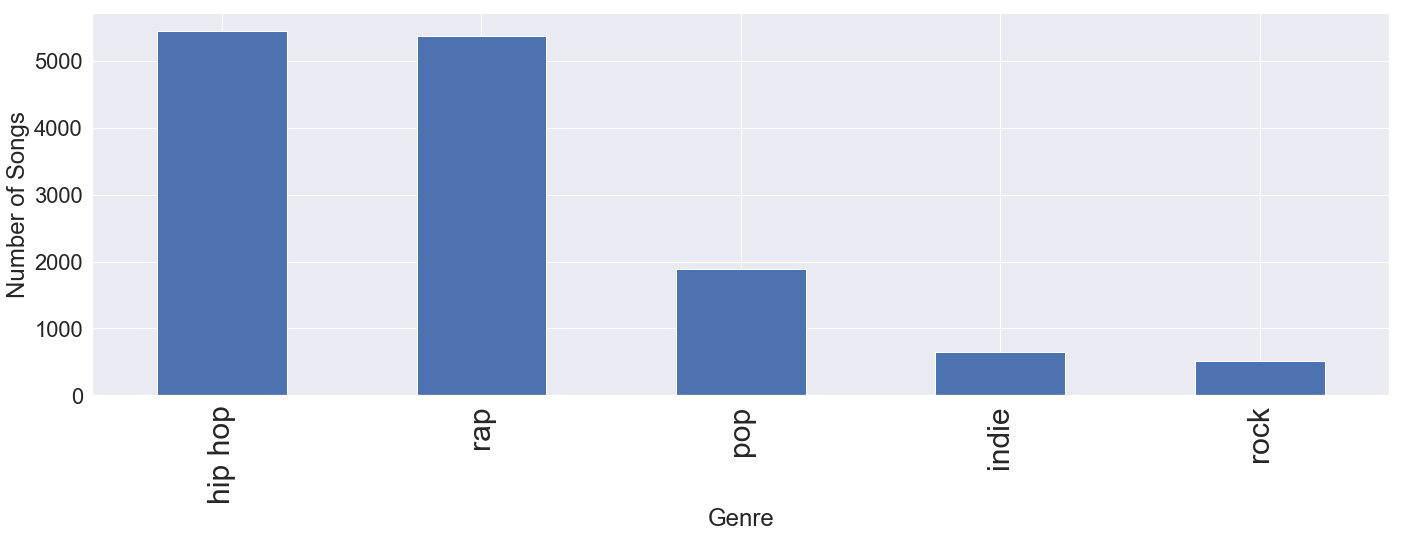

In [36]:
fig = plt.figure(figsize=(20,8))
df = countries_df.loc['FR'].sort_values(ascending=False)
ax = df[fr != 0][:5].plot(kind="bar") # plot top 5 genres
ax.set_ylabel('Number of Songs')
ax.set_xlabel('Genre')
ax.tick_params(axis = 'x', which = 'major', labelsize = 30)
plt.tight_layout()
# plt.savefig('../report/report_graphics/france_genre_dist.png', dpi=1000)

### Genre Distribution for Indonesia

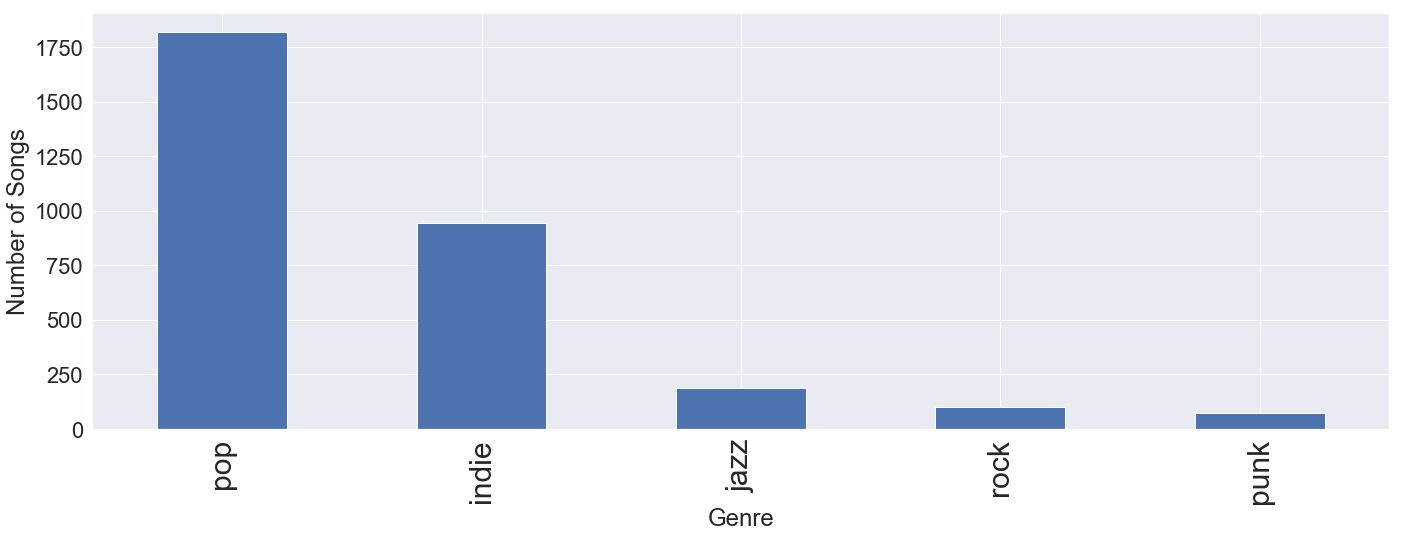

In [37]:
fig = plt.figure(figsize=(20,8))
df = countries_df.loc['ID'].sort_values(ascending=False)
ax = df[df != 0][:5].plot(kind="bar") # plot top 5 genres
ax.set_ylabel('Number of Songs')
ax.set_xlabel('Genre')
ax.tick_params(axis = 'x', which = 'major', labelsize = 30)
plt.tight_layout()
# plt.savefig('../report/report_graphics/indonesia_genre_dist.png', dpi=1000)

In [25]:
vader_scores = pd.read_csv('../data/vader_scores.txt')

In [26]:
genres = pd.read_csv('../data/genres.txt')
genres = genres.merge(right=vader_scores, on='song_id', how='inner')
genres.head()

,song_id,acoustic,afrobeat,alt-rock,alternative,ambient,anime,black-metal,bluegrass,blues,...,study,summer,synth-pop,tango,techno,trance,trip-hop,work-out,world-music,vader_score
0,6cbqh8woSu03Vj8s1PCK9C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.188708
1,3xIHePHJbOEtnzlwAOoCtz,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.220677
2,3zb1zBmkrPF6VW8RhlSYA1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.015660
3,6A8KuRrV72ZP4MneZRCsSm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.222052
4,7hphy8rtxpYshs3UzDZTzN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.207939


#### Assign song's VADER score to each genre it is associated with

In [27]:
genres.iloc[:,1:(len(genres.columns)-1)] = genres.iloc[:,1:(len(genres.columns)-1)].multiply(genres['vader_score'], axis='index')

In [29]:
genre_list = []
avg_list = []
for col in genres.columns[1:-1]:
    genre = genres[genres[col] != 0][col]
    if (len(genre) > 20):
        avg_list.append(genre.mean())
        genre_list.append(col)

In [30]:
tups = list(zip(genre_list, avg_list))
genre_vader = pd.DataFrame(tups, columns=['genre','vader_score'])
genre_vader.head()

,genre,vader_score
0,acoustic,0.153209
1,alternative,0.076980
2,ambient,0.217133
3,bluegrass,0.085618
4,blues,0.136879


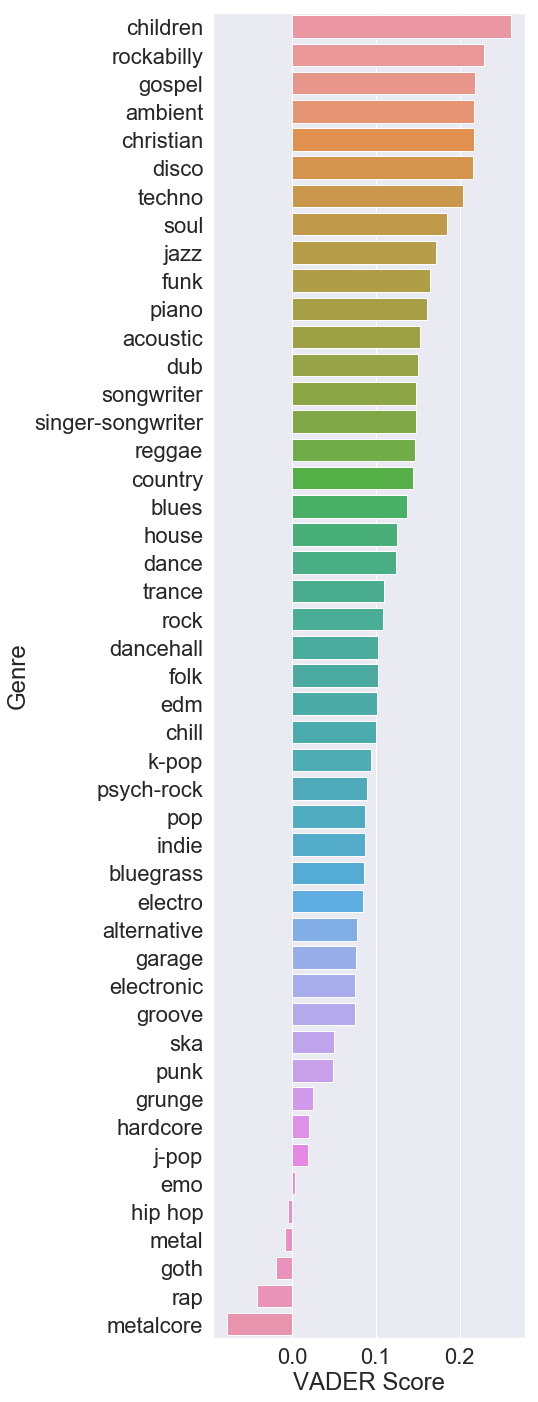

In [34]:
fig = plt.figure(figsize=(8,20))
ax = sns.barplot(data=genre_vader.sort_values(by='vader_score',ascending=False), y='genre', x='vader_score', orient='h')
ax.set_ylabel('Genre')
ax.set_xlabel('VADER Score')
plt.tight_layout()
# plt.savefig('../report/report_graphics/genre_vader.png', dpi=800)